In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\Housing.csv")


In [3]:
# Inspect
print(df.shape)
print(df.info())
print(df.head())

(545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes    

In [4]:
# Descriptive statistics
print(df.describe(include="all"))


               price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02    545.000000  545.000000  545.000000  545.000000   
unique           NaN           NaN         NaN         NaN         NaN   
top              NaN           NaN         NaN         NaN         NaN   
freq             NaN           NaN         NaN         NaN         NaN   
mean    4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std     1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min     1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%     3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%     4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%     5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max     1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

       mainroad guestroom basement hotwaterheating airconditioning  \
count       545       545      545       

In [5]:
# Missing values
missing_pct = df.isnull().mean() * 100
print(missing_pct)


price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


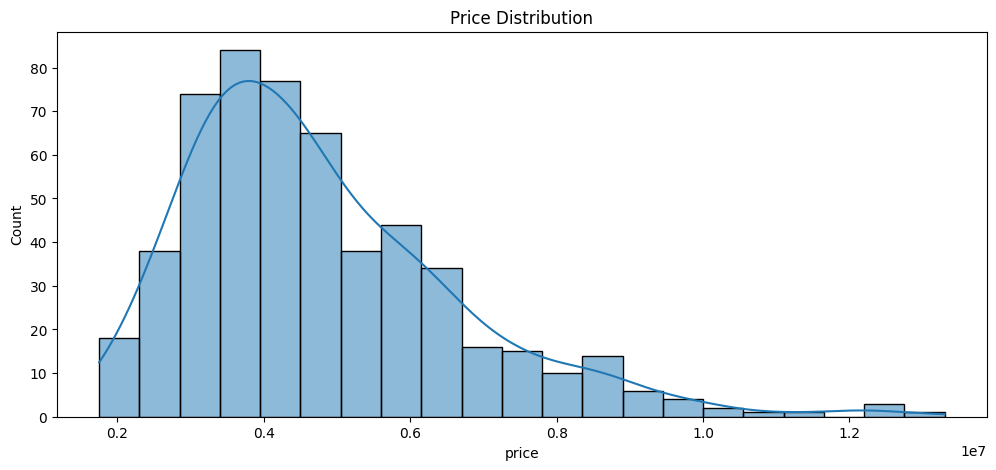

In [6]:
# Distribution plots
plt.figure(figsize=(12,5))
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()


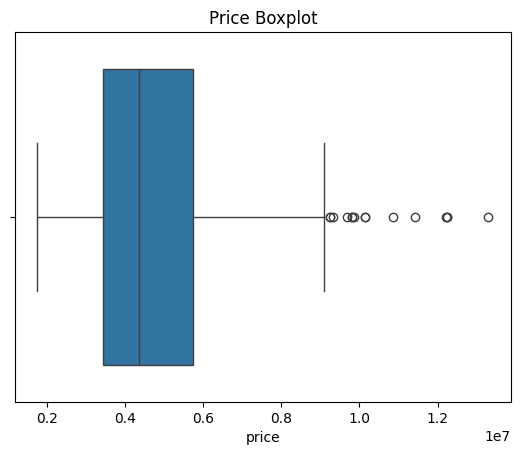

In [7]:
sns.boxplot(x=df["price"])
plt.title("Price Boxplot")
plt.show()


In [8]:
# Outlier detection (IQR)
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR


In [9]:
df["price_outlier"] = ((df["price"] < lower_bound) | (df["price"] > upper_bound)).astype(int)


In [10]:
# Handle outliers (capping)
df.loc[df["price"] > upper_bound, "price"] = upper_bound
df.loc[df["price"] < lower_bound, "price"] = lower_bound


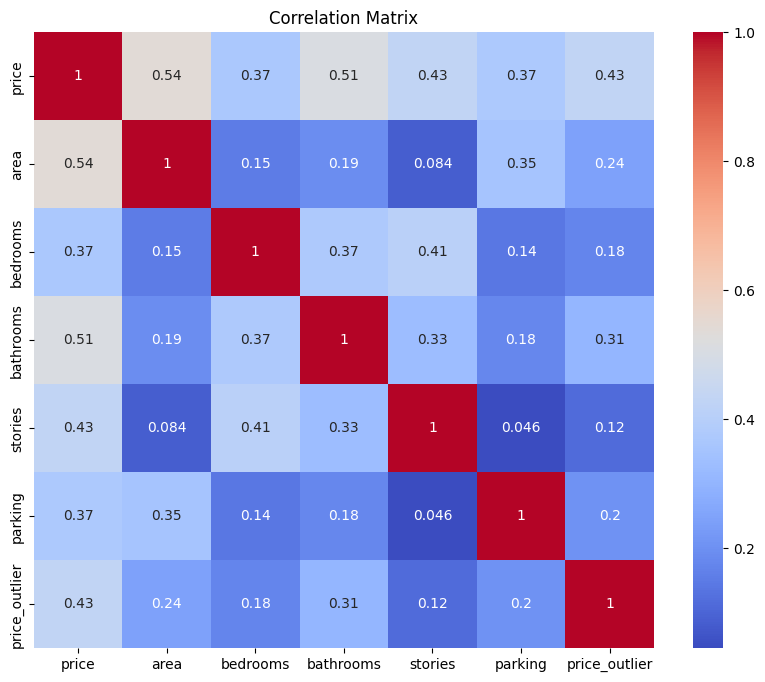

In [11]:
# Correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

In [12]:
print(corr["price"].sort_values(ascending=False))


price            1.000000
area             0.539092
bathrooms        0.508686
price_outlier    0.432017
stories          0.431724
parking          0.373578
bedrooms         0.368216
Name: price, dtype: float64


In [13]:
# Export cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)
